In [2]:
cd drive/MyDrive/task2/

/content/drive/MyDrive/task2


In [3]:
ls

dataset/


In [4]:
import numpy as np # linear algebra
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt # to show images
from PIL import Image # to read images
import os
import glob
import csv

def bounding_box(image_name):

    label_file = 'dataset/annotations.xml'
    tree = ET.parse(label_file)
    root = tree.getroot()
    image_id = image_name.rsplit(".", 1)[0]
    bbox_all = []
    labels = []

    for image in root.findall('image'):

        if image.attrib['id'] == image_id:

            bbox = []
            mask = -1
            helmet = -1

            for allBboxes in image.findall('box'):

              if allBboxes.attrib['label'] == 'head':

                  xmin = int(float(allBboxes.attrib['xtl']))
                  ymin = int(float(allBboxes.attrib['ytl']))
                  xmax = int(float(allBboxes.attrib['xbr']))
                  ymax = int(float(allBboxes.attrib['ybr']))

                  bbox = [xmin, ymin, xmax, ymax]
                  bbox_all.append(bbox)

                  for attributes in allBboxes.findall('attribute'):

                    if attributes.attrib['name'] == 'mask':
                        
                        if attributes.text == 'yes':
                          mask = 1
                        if attributes.text == 'invisible':
                          mask = 0
                        if attributes.text == 'no':
                          mask = 0
                        if attributes.text == 'wrong':
                          mask = 0

                    if attributes.attrib['name'] == 'has_safety_helmet':
                        
                        if attributes.text == 'yes':
                          helmet = 1
                        if attributes.text == 'no':
                          helmet = 0
                    
                  labels.append([helmet, mask])

    return bbox_all, labels


all_images=os.listdir("dataset/images/")
root_images = "dataset/images/"
new_dataset = "dataset/images_new/"

with open('dataset.csv', mode='w') as csv_file:
        fieldnames = ['image', 'helmet', 'mask']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()

        for i,image in enumerate(all_images):
            box, labels = bounding_box(image)

            

            j = 0

            for i, bbox in enumerate(box):

                if len(bbox) != 0:
            
                    j = j+1
                    print(bbox)
                    print(labels[i])
                    im=Image.open(os.path.join(root_images,image))
                    im=im.crop(bbox)
                    im = im.save(new_dataset+image.rsplit(".", 1)[0]+"_"+str(j)+".jpg")

                    writer.writerow({'image': new_dataset+image.rsplit(".", 1)[0]+"_"+str(j)+".jpg", 'helmet': labels[i][0], 'mask': labels[i][1]})

[67, 46, 121, 119]
[0, 1]
[57, 28, 81, 67]
[1, 1]
[185, 26, 208, 62]
[1, 0]
[78, 17, 125, 103]
[1, 1]
[105, 2, 123, 42]
[1, 0]
[81, 140, 86, 151]
[0, 0]
[95, 83, 124, 150]
[1, 1]
[69, 60, 82, 87]
[1, 0]
[53, 67, 60, 76]
[0, 0]
[118, 73, 125, 87]
[0, 0]
[6, 91, 35, 156]
[0, 0]
[145, 56, 159, 80]
[1, 0]
[105, 62, 118, 89]
[1, 0]
[91, 49, 105, 76]
[1, 0]
[127, 62, 143, 89]
[1, 0]
[188, 60, 203, 87]
[1, 0]
[129, 118, 138, 134]
[1, 0]
[98, 116, 114, 145]
[1, 0]
[67, 114, 76, 127]
[1, 0]
[171, 67, 173, 73]
[0, 0]
[30, 32, 32, 36]
[0, 0]
[25, 28, 27, 33]
[1, 0]
[35, 33, 37, 37]
[1, 0]
[0, 22, 29, 118]
[1, 1]
[103, 44, 138, 123]
[1, 1]
[41, 46, 42, 49]
[1, 0]
[173, 69, 175, 73]
[1, 0]
[13, 23, 15, 28]
[0, 0]
[40, 0, 67, 44]
[0, 1]
[150, 0, 179, 60]
[0, 1]
[121, 75, 146, 103]
[1, 1]
[69, 53, 118, 105]
[0, 0]
[165, 73, 202, 108]
[1, 1]
[188, 67, 203, 96]
[1, 1]
[9, 58, 31, 87]
[1, 1]
[132, 83, 144, 96]
[1, 0]
[88, 5, 122, 62]
[1, 1]
[9, 116, 15, 125]
[0, 0]
[58, 29, 80, 80]
[1, 1]
[92, 33, 112, 

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train = pd.read_csv('dataset.csv')    # reading the csv file
train.head()      # printing first five rows of the file

print(train.columns)


Index(['image', 'helmet', 'mask'], dtype='object')


In [29]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(train['image'][i],target_size=(64,64,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1792/1792 [00:02<00:00, 747.87it/s]


In [30]:
X.shape

(1792, 64, 64, 3)

In [31]:
y = np.array(train.drop(['image'],axis=1))                       
y.shape

(1792, 2)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [36]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation="relu", input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 32)       

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/5
79/79 [==============================] - 4s 47ms/step - loss: 0.6632 - accuracy: 0.8141 - val_loss: 0.6456 - val_accuracy: 0.9182
Epoch 2/5
79/79 [==============================] - 4s 44ms/step - loss: 0.6387 - accuracy: 0.9391 - val_loss: 0.6263 - val_accuracy: 0.9182
Epoch 3/5
79/79 [==============================] - 3s 44ms/step - loss: 0.6264 - accuracy: 0.9425 - val_loss: 0.6251 - val_accuracy: 0.9182
Epoch 4/5
79/79 [==============================] - 3s 44ms/step - loss: 0.6284 - accuracy: 0.9312 - val_loss: 0.6196 - val_accuracy: 0.9182
Epoch 5/5
79/79 [==============================] - 4s 45ms/step - loss: 0.6275 - accuracy: 0.9328 - val_loss: 0.6193 - val_accuracy: 0.9182


In [54]:
model.save("helmet_mask_model.h5")

In [56]:
model = keras.models.load_model("helmet_mask_model.h5")

In [57]:
img = image.load_img('dataset/images_new/0_1.jpg',target_size=(64,64,3))                       
img = image.img_to_array(img)                       
img = img/255

helmet (0.598)
mask (0.33)


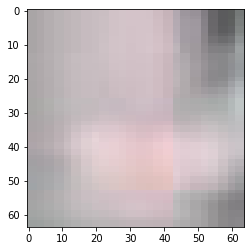

In [58]:
classes = np.array(train.columns[1:])
proba = model.predict(img.reshape(1,64,64,3))
plt.imshow(img)
for i in range(2):
  print("{}".format(classes[i])+" ({:.3})".format(proba[0][i]))